In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/modified_flat_model.csv'
raw_data = pd.read_csv(file_path)

In [ ]:
print(raw_data.head())

     month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            60.0        IMPROVED                 1986      255000.0   
1            68.0  NEW GENERATION                 1981      275000.0   
2            69.0  NEW GENERATION                 1980      285000.0   
3            68.0  NEW GENERATION                 1979      290000.0   
4            68.0  NEW GENERATION                 1980      290000.0   

   remaining_lease  
0              840  
1              780  
2              768  
3              756  
4              76

In [ ]:
categorical_columns = ["town", "flat_type", "storey_range", "flat_model"]

# Print unique categories and their count
for col in categorical_columns:
    unique_values = raw_data[col].unique()
    print(f"Column: {col}")
    print(f"Number of unique categories: {len(unique_values)}")
    print("Categories:", unique_values)
    print("-" * 50)

Column: town
Number of unique categories: 26
Categories: ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
--------------------------------------------------
Column: flat_type
Number of unique categories: 7
Categories: ['3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']
--------------------------------------------------
Column: storey_range
Number of unique categories: 17
Categories: ['07 TO 09' '01 TO 03' '13 TO 15' '10 TO 12' '04 TO 06' '19 TO 21'
 '16 TO 18' '22 TO 24' '25 TO 27' '28 TO 30' '34 TO 36' '46 TO 48'
 '31 TO 33' '37 TO 39' '43 TO 45' '40 TO 42' '49 TO 51']
--------------------------------------------------
Column: flat_model
Number of unique categories: 21
Categories:

In [ ]:
town_order = [
    'ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG',
    'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG',
    'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE',
    'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON',
    'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN'
]

flat_type_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'MULTI-GENERATION', 'EXECUTIVE']

storey_range_order = [
    '01 TO 03', '04 TO 06', '07 TO 09', '10 TO 12', '13 TO 15', '16 TO 18', '19 TO 21',
    '22 TO 24', '25 TO 27', '28 TO 30', '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42',
    '43 TO 45', '46 TO 48', '49 TO 51'
]

flat_model_order = [
    'IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
    'PREMIUM APARTMENT', 'MAISONETTE', 'APARTMENT', 'MODEL A2', 'TYPE S1',
    'TYPE S2', 'ADJOINED FLAT', 'TERRACE', 'DBSS', 'MODEL A-MAISONETTE',
    'PREMIUM MAISONETTE', 'MULTI GENERATION', 'PREMIUM APARTMENT LOFT',
    'IMPROVED-MAISONETTE', '2-ROOM', '3GEN'
]

# One-hot encode 'town' and 'flat_model'
raw_data = pd.get_dummies(raw_data, columns=['town', 'flat_model'], prefix=['town', 'flat_model'], dtype=int)

# Label encode 'flat_type' and 'storey_range' based on specified order
raw_data['flat_type'] = raw_data['flat_type'].map({val: idx for idx, val in enumerate(flat_type_order)})
raw_data['storey_range'] = raw_data['storey_range'].map({val: idx for idx, val in enumerate(storey_range_order)})

# Display first few rows to verify
print(raw_data.head())


     month  flat_type block        street_name  storey_range  floor_area_sqm  \
0  2015-01          2   174   ANG MO KIO AVE 4             2            60.0   
1  2015-01          2   541  ANG MO KIO AVE 10             0            68.0   
2  2015-01          2   163   ANG MO KIO AVE 4             0            69.0   
3  2015-01          2   446  ANG MO KIO AVE 10             0            68.0   
4  2015-01          2   557  ANG MO KIO AVE 10             2            68.0   

   lease_commence_date  resale_price  remaining_lease  town_ANG MO KIO  ...  \
0                 1986      255000.0              840                1  ...   
1                 1981      275000.0              780                1  ...   
2                 1980      285000.0              768                1  ...   
3                 1979      290000.0              756                1  ...   
4                 1980      290000.0              768                1  ...   

   flat_model_MULTI GENERATION  flat_model_N

In [ ]:
raw_data.to_csv("modified_flat_model_one_hot_encoded.csv", index=False)

In [ ]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
df = raw_data.copy()

Saved previous resale prices successfully!
[0]	train-mae:119582.72144	test-mae:159463.58551
[10]	train-mae:83311.07253	test-mae:116672.76554
[20]	train-mae:61362.70674	test-mae:88852.42749
[30]	train-mae:48838.47911	test-mae:72205.33434
[40]	train-mae:41557.05823	test-mae:62895.52867
[50]	train-mae:37216.75451	test-mae:57767.57877
[60]	train-mae:34437.86825	test-mae:54137.31133
[70]	train-mae:32603.58868	test-mae:51049.16463
[80]	train-mae:31261.60863	test-mae:49425.73773
[90]	train-mae:30193.70336	test-mae:48420.66830
[100]	train-mae:29355.82250	test-mae:47505.67452
[110]	train-mae:28627.28292	test-mae:46576.05503
[120]	train-mae:28002.16544	test-mae:46153.18258
[130]	train-mae:27403.02325	test-mae:45540.50294
[140]	train-mae:26969.30680	test-mae:45421.17411
[150]	train-mae:26538.82242	test-mae:44995.93217
[160]	train-mae:26129.89720	test-mae:44697.22001
[170]	train-mae:25735.60361	test-mae:44425.33626
[180]	train-mae:25370.46524	test-mae:44366.70680
[190]	train-mae:25109.45137	test-m

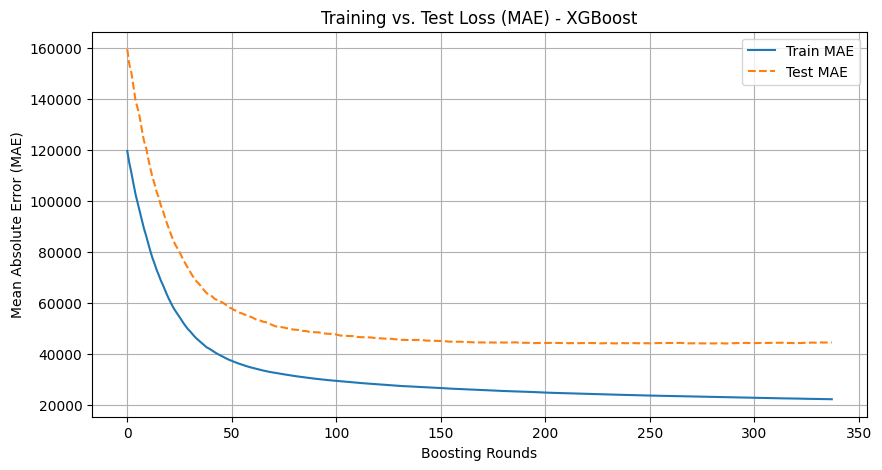

In [ ]:
# Convert 'month' column to datetime format
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Extract year and month as separate features
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month

# Sort the dataset by time
df = df.sort_values(by=['month'])

# Drop 'street_name' column since it's not needed
df = df.drop(columns=['street_name'])

# Ensure 'block' is treated as a numerical column
df['block'] = pd.to_numeric(df['block'], errors='coerce')  # Convert to numeric format

# Create a lag feature: previous month's average resale price for each flat type
df['prev_month_resale_price'] = df.groupby(['flat_type'])['resale_price'].shift(1)

# Fill missing values in lag features using the latest available value per flat type
df['prev_month_resale_price'] = df.groupby(['flat_type'])['prev_month_resale_price'].ffill()

# Drop rows where we still have missing values after forward fill (i.e., first month’s data)
df = df.dropna(subset=['prev_month_resale_price'])

# Drop original 'month' column (since we've extracted numerical features)
df = df.drop(columns=['month'])

# Ensure data is sorted by date
df = df.sort_values(by=["year", "month_num"])

# Save previous month's average resale prices for use in Streamlit
prev_prices = df.groupby(['flat_type', 'year', 'month_num'])['resale_price'].mean().reset_index()
prev_prices.rename(columns={'resale_price': 'prev_month_resale_price'}, inplace=True)
prev_prices.to_csv("prev_prices.csv", index=False)
print("Saved previous resale prices successfully!")

# Define cutoff for training (end of 2022)
train_cutoff = (2022, 12)

# Training set: Data before Jan 2023
train_data = df[(df["year"] < train_cutoff[0]) | ((df["year"] == train_cutoff[0]) & (df["month_num"] <= train_cutoff[1]))]

# Test set: Data from Jan 2023 onward
test_data = df[(df["year"] > train_cutoff[0]) | ((df["year"] == train_cutoff[0]) & (df["month_num"] > train_cutoff[1]))]

# Define X and y
X_train, y_train = train_data.drop(columns=["resale_price"]), train_data["resale_price"]
X_test, y_test = test_data.drop(columns=["resale_price"]), test_data["resale_price"]

# Convert data to DMatrix (for better XGBoost efficiency)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

evals = [(dtrain, "train"), (dtest, "test")]

# Specify XGBoost parameters
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "eval_metric": "mae"  # Mean Absolute Error
}

# Train XGBoost model with evaluation log
evals_result = {}  # Dictionary to store loss values

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=650,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=10,
    evals_result=evals_result  # Store training history
)

# Extract MAE values from evals_result
train_mae = evals_result['train']['mae']
test_mae = evals_result['test']['mae']

# Plot training vs. test MAE
plt.figure(figsize=(10, 5))
plt.plot(train_mae, label="Train MAE")
plt.plot(test_mae, label="Test MAE", linestyle="dashed")
plt.xlabel("Boosting Rounds")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Training vs. Test Loss (MAE) - XGBoost")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("First date in training set:", df.iloc[:len(X_train)]['year'].min(), df.iloc[:len(X_train)]['month_num'].min())
print("Last date in training set:", df.iloc[:len(X_train)]['year'].max(), df.iloc[:len(X_train)]['month_num'].max())

print("First date in test set:", df.iloc[len(X_train):]['year'].min(), df.iloc[len(X_train):]['month_num'].min())
print("Last date in test set:", df.iloc[len(X_train):]['year'].max(), df.iloc[len(X_train):]['month_num'].max())


First date in training set: 2015 1
Last date in training set: 2022 12
First date in test set: 2023 1
Last date in test set: 2025 12


In [ ]:
# Make predictions
y_pred = xgb_model.predict(dtest)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Save the model
xgb_model.save_model("/content/drive/My Drive/hdb_xgboost_model.json")
print("Model saved")

xgb_model.save_model("hdb_xgboost_model.model")  # Save as binary model


Mean Absolute Error: 44415.406948783144
Model saved successfully!


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:06:08] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
